In [1]:
require(ggplot2)
require(tidyverse)
require(RColorBrewer)
require(vegan)
require(knitr)
require(reshape2)
library(xlsx)
library(RColorBrewer)

Loading required package: ggplot2
Loading required package: tidyverse
Warning message:
"package 'tidyverse' was built under R version 3.4.4"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
√ tibble  1.4.2     √ purrr   0.2.4
√ tidyr   0.8.0     √ dplyr   0.7.4
√ readr   1.1.1     √ stringr 1.3.0
√ tibble  1.4.2     √ forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: RColorBrewer
Loading required package: vegan
Loading required package: permute
Loading required package: lattice
This is vegan 2.4-6
Loading required package: knitr
Loading required package: reshape2

Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths

Loading required package: rJava
Loading required package: xlsxjars


In [2]:
taxa <- read.delim("Description_otu_table_L6.txt", sep='\t', row=1)
head(taxa)

,Gil34,Gil30,Gil31,Gil32,Gil33,IBD,Gil18,Gil19,Gil16,Gil17,...,Gil24,Gil8,Gil9,Gil4,Gil5,Gil6,Gil7,Gil1,Gil2,Gil3
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter,0,0,0,0,0,4.159156e-06,0,0,0,0,...,0,2.448362e-04,1.436110e-03,0,0,0,0,0,0,0
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanosphaera,0,0,0,0,0,0.000000e+00,0,0,0,0,...,0,7.122507e-04,5.566317e-05,0,0,0,0,0,0,0
k__Archaea;p__Euryarchaeota;c__Methanomicrobia;o__Methanosarcinales;f__Methanosaetaceae;g__Methanosaeta,0,0,0,0,0,0.000000e+00,0,0,0,0,...,0,1.112892e-05,1.113263e-05,0,0,0,0,0,0,0
k__Archaea;p__Euryarchaeota;c__Methanomicrobia;o__Methanosarcinales;f__Methanosarcinaceae;g__Methanosarcina,0,0,0,0,0,0.000000e+00,0,0,0,0,...,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0
k__Archaea;p__Euryarchaeota;c__Thermoplasmata;o__Thermoplasmatales;f__Thermoplasmatales Incertae Sedis;g__Methanomassiliicoccus,0,0,0,0,0,0.000000e+00,0,0,0,0,...,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0
k__Bacteria;p__Acidobacteria;c__Blastocatellia;o__Blastocatellales;f__Blastocatellaceae (Subgroup 4);g__11-24,0,0,0,0,0,0.000000e+00,0,0,0,0,...,0,1.112892e-05,0.000000e+00,0,0,0,0,0,0,0


In [3]:
split <- strsplit(rownames(taxa),";")
head(rownames(taxa))

[1] "k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter"              
[2] "k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanosphaera"                  
[3] "k__Archaea;p__Euryarchaeota;c__Methanomicrobia;o__Methanosarcinales;f__Methanosaetaceae;g__Methanosaeta"                        
[4] "k__Archaea;p__Euryarchaeota;c__Methanomicrobia;o__Methanosarcinales;f__Methanosarcinaceae;g__Methanosarcina"                    
[5] "k__Archaea;p__Euryarchaeota;c__Thermoplasmata;o__Thermoplasmatales;f__Thermoplasmatales Incertae Sedis;g__Methanomassiliicoccus"
[6] "k__Bacteria;p__Acidobacteria;c__Blastocatellia;o__Blastocatellales;f__Blastocatellaceae (Subgroup 4);g__11-24"

In [4]:
head(split)

[[1]]
[1] "k__Archaea"             "p__Euryarchaeota"       "c__Methanobacteria"    
[4] "o__Methanobacteriales"  "f__Methanobacteriaceae" "g__Methanobrevibacter" 

[[2]]
[1] "k__Archaea"             "p__Euryarchaeota"       "c__Methanobacteria"    
[4] "o__Methanobacteriales"  "f__Methanobacteriaceae" "g__Methanosphaera"     

[[3]]
[1] "k__Archaea"           "p__Euryarchaeota"     "c__Methanomicrobia"  
[4] "o__Methanosarcinales" "f__Methanosaetaceae"  "g__Methanosaeta"     

[[4]]
[1] "k__Archaea"            "p__Euryarchaeota"      "c__Methanomicrobia"   
[4] "o__Methanosarcinales"  "f__Methanosarcinaceae" "g__Methanosarcina"    

[[5]]
[1] "k__Archaea"                          "p__Euryarchaeota"                   
[3] "c__Thermoplasmata"                   "o__Thermoplasmatales"               
[5] "f__Thermoplasmatales Incertae Sedis" "g__Methanomassiliicoccus"           

[[6]]
[1] "k__Bacteria"                       "p__Acidobacteria"                 
[3] "c__Blastocatellia"                 "o__Blastocatellales"              
[5] "f__Blastocatellaceae (Subgroup 4)" "g__11-24"

In [5]:
taxaStrings <- sapply(split,function(x) paste(x[1:6],collapse=";"))
gtaxa <- taxa
splitg <- strsplit(rownames(gtaxa),";")                               # Split and rejoin on lv7
gtaxaStrings <- sapply(splitg,function(x) paste(x[1:6],collapse=";")) # level 7 is species, 8 is strain
gtaxa <- rowsum(gtaxa,gtaxaStrings)                                    # Collapse by taxonomy name
gtaxa <- sweep(gtaxa,2,colSums(gtaxa),'/')
gtaxa <- gtaxa[order(rowMeans(gtaxa),decreasing=T),]

In [6]:
filtered.taxa <- gtaxa[1:15,] * 100
#filtered.taxa <- gtaxa * 100
#traspose to add to map for later use
filtered.taxa <- t(filtered.taxa)
colnames(filtered.taxa) <- gsub(".*;g__?", "", colnames(filtered.taxa))
colnames(filtered.taxa) <- gsub("_", "", colnames(filtered.taxa))
colnames(filtered.taxa) <- gsub(";.*","",colnames(filtered.taxa))

head(filtered.taxa)

,Bacteroides,Prevotella 9,Faecalibacterium,Bifidobacterium,Blautia,Parabacteroides,[Eubacterium] coprostanoligenes group,Alistipes,uncultured bacterium,Escherichia-Shigella,Roseburia,Ruminococcaceae UCG-002,Lachnospiraceae UCG-008,Akkermansia,Prevotella 2
Gil34,23.07988,0.000000000,11.094204,0.04149952,3.4229415,1.58159266,2.201011359,6.36940717,7.66204024,0.02612932,1.507816,2.7389680,0.5932894,6.7828653,0.000000
Gil30,16.68995,3.247942866,5.905915,7.91026238,6.2241888,8.27977022,6.613879832,1.28706723,0.00776277,0.00000000,1.892563,1.3553796,1.2358329,0.0000000,4.196553
Gil31,66.39226,0.000000000,2.881272,2.81740118,2.2875121,0.01892461,0.001182788,0.06741892,0.23182646,2.76535850,1.088165,0.0000000,0.7912852,0.0000000,0.000000
Gil32,40.40468,0.000000000,22.978358,1.72348245,2.4359678,3.55397851,0.832171672,0.74205494,0.12672665,0.08448443,2.403582,0.0000000,0.7448711,0.0000000,0.000000
Gil33,38.18386,0.000000000,9.873941,1.68217560,7.3180879,10.19983636,0.047150841,7.91856772,0.14699968,0.05131121,2.268788,0.0000000,2.4227212,0.0000000,0.000000
IBD,40.93182,0.004159156,15.823146,0.04824621,0.9029009,1.09344221,0.068574090,2.85910806,0.76523278,0.50112635,6.134496,0.0729412,0.6104602,0.5219741,0.000000


In [7]:
filtered.taxa.df <- as.data.frame(filtered.taxa)

one.minus.sum <- function(row) { return(100 - sum(row)) }

filtered.taxa.df$etc <- apply(filtered.taxa.df, 1, one.minus.sum)

In [8]:
f.t <- t(filtered.taxa.df)

f.t <- apply(f.t, 2,function(x) {round(x,2)})
head(f.t, 15)

,Gil34,Gil30,Gil31,Gil32,Gil33,IBD,Gil18,Gil19,Gil16,Gil17,...,Gil24,Gil8,Gil9,Gil4,Gil5,Gil6,Gil7,Gil1,Gil2,Gil3
Bacteroides,23.08,16.69,66.39,40.40,38.18,40.93,3.21,34.35,22.32,39.31,...,5.00,7.53,14.91,47.69,27.42,61.70,2.39,16.60,35.38,38.66
Prevotella 9,0.00,3.25,0.00,0.00,0.00,0.00,9.41,0.00,0.00,0.00,...,55.84,0.76,30.14,1.50,0.00,0.00,39.68,0.00,0.00,6.98
Faecalibacterium,11.09,5.91,2.88,22.98,9.87,15.82,9.50,5.08,22.89,2.27,...,2.92,4.77,7.87,11.80,20.27,3.73,0.98,11.36,0.06,12.76
Bifidobacterium,0.04,7.91,2.82,1.72,1.68,0.05,4.82,4.40,18.77,2.11,...,0.69,0.03,0.69,0.12,6.26,1.67,0.35,1.34,12.62,0.83
Blautia,3.42,6.22,2.29,2.44,7.32,0.90,1.81,2.99,2.70,4.58,...,0.90,3.79,1.06,1.02,0.12,0.58,0.29,22.14,0.88,10.04
Parabacteroides,1.58,8.28,0.02,3.55,10.20,1.09,0.46,1.61,0.06,9.34,...,0.41,1.63,1.27,0.61,16.91,0.30,2.28,3.71,3.19,1.72
[Eubacterium] coprostanoligenes group,2.20,6.61,0.00,0.83,0.05,0.07,14.71,0.00,0.00,0.01,...,1.98,5.17,3.95,4.03,0.00,0.57,8.92,0.14,0.01,0.00
Alistipes,6.37,1.29,0.07,0.74,7.92,2.86,0.22,1.11,0.03,1.64,...,0.71,2.56,4.13,0.22,0.13,3.04,1.03,0.68,2.30,4.18
uncultured bacterium,7.66,0.01,0.23,0.13,0.15,0.77,0.61,0.55,0.00,0.35,...,5.42,5.50,8.86,0.75,0.29,0.05,7.69,0.25,1.62,0.14
Escherichia-Shigella,0.03,0.00,2.77,0.08,0.05,0.50,0.02,9.52,0.04,2.21,...,0.01,0.01,0.16,0.12,13.09,0.08,0.06,0.07,1.62,0.33


In [9]:
#sth <- f.t.df[order(f.t.df$Gil1, f.t.df$American, decreasing = TRUE),, drop=FALSE]
#head(sth, 20)

In [10]:
#sample.name <- 'Gil1'

f.t.df <- as.data.frame(f.t)
#f.t.df <- f.t.df %>% select(sample.name, American)
head(f.t.df)

,Gil34,Gil30,Gil31,Gil32,Gil33,IBD,Gil18,Gil19,Gil16,Gil17,...,Gil24,Gil8,Gil9,Gil4,Gil5,Gil6,Gil7,Gil1,Gil2,Gil3
Bacteroides,23.08,16.69,66.39,40.40,38.18,40.93,3.21,34.35,22.32,39.31,...,5.00,7.53,14.91,47.69,27.42,61.70,2.39,16.60,35.38,38.66
Prevotella 9,0.00,3.25,0.00,0.00,0.00,0.00,9.41,0.00,0.00,0.00,...,55.84,0.76,30.14,1.50,0.00,0.00,39.68,0.00,0.00,6.98
Faecalibacterium,11.09,5.91,2.88,22.98,9.87,15.82,9.50,5.08,22.89,2.27,...,2.92,4.77,7.87,11.80,20.27,3.73,0.98,11.36,0.06,12.76
Bifidobacterium,0.04,7.91,2.82,1.72,1.68,0.05,4.82,4.40,18.77,2.11,...,0.69,0.03,0.69,0.12,6.26,1.67,0.35,1.34,12.62,0.83
Blautia,3.42,6.22,2.29,2.44,7.32,0.90,1.81,2.99,2.70,4.58,...,0.90,3.79,1.06,1.02,0.12,0.58,0.29,22.14,0.88,10.04
Parabacteroides,1.58,8.28,0.02,3.55,10.20,1.09,0.46,1.61,0.06,9.34,...,0.41,1.63,1.27,0.61,16.91,0.30,2.28,3.71,3.19,1.72


In [11]:
df <- melt(f.t, varnames=c("Genus", "Sample"), value.name="Proportion")
head(df)

Genus,Sample,Proportion
Bacteroides,Gil34,23.08
Prevotella 9,Gil34,0.00
Faecalibacterium,Gil34,11.09
Bifidobacterium,Gil34,0.04
Blautia,Gil34,3.42
Parabacteroides,Gil34,1.58


In [12]:
colourCount <- 21
getPalette = colorRampPalette(brewer.pal(7, "Set3"))

In [13]:
sample.name <- 'Gil9'

In [14]:
long <- df %>% filter(Sample==sample.name | Sample=="American")
wf <- f.t.df %>% select(sample.name,American)

Warning message:
"package 'bindrcpp' was built under R version 3.4.4"

In [15]:
p <- ggplot(long) + geom_bar(aes(x=Sample, y=Proportion, fill=Genus), stat = "identity") +    scale_fill_manual(values = getPalette(colourCount))

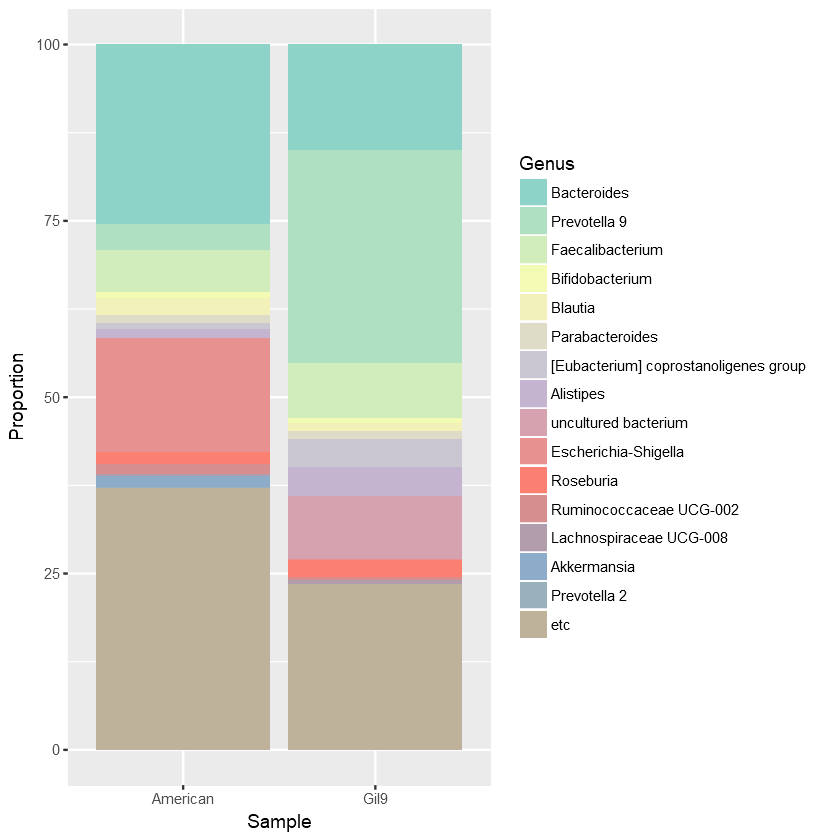

In [16]:
wf <- f.t.df %>% select(sample.name,American)
print(p)

In [41]:
ggsave(filename = paste0(sample.name,".png"), plot = p ,width=5, height = 10, dpi= 100)

In [42]:
write.xlsx(wf, paste0(sample.name, '.xlsx'))

In [30]:
wf

,Gil9,American
Bacteroides,14.91,25.42
Prevotella 9,30.14,3.59
Faecalibacterium,7.87,5.98
Bifidobacterium,0.69,0.82
Blautia,1.06,2.39
Parabacteroides,1.27,1.20
[Eubacterium] coprostanoligenes group,3.95,0.81
Alistipes,4.13,1.28
uncultured bacterium,8.86,0.05
Escherichia-Shigella,0.16,16.10
